In [64]:
%pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


# LIBRARY

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm

# FUNCTION

In [19]:
def boxPlot(df, kolom_awal, kolom_akhir):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.iloc[:, kolom_awal:kolom_akhir], orient='h')
    df.shape

In [54]:
def multHistogram(df, n_rows, n_columns):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 5))

    # Menyusun histogram untuk setiap kolom dalam subplot
    for i, col in enumerate(df.columns):
        ax = axes.flatten()[i]
        ax.hist(df[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
        ax.set_title(col)
        ax.set_xlabel('Nilai')
        ax.set_ylabel('Frekuensi')

    # Menyesuaikan layout dan menampilkan plot
    plt.tight_layout()
    plt.show()

In [59]:
def matrixCorr(df):
    corr_matrix = df.corr()

    # Menampilkan matriks korelasi dengan heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Matriks Korelasi')
    plt.show()

In [67]:
def scatterPlot(x,y):
    # Create a scatter plot
    plt.scatter(x, y)

    # Add labels and a title
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Scatter Plot Example')

    # Show the plot
    plt.show()


In [85]:
def scatterPlot(x,y,linearLine,coef,intercept):
    # Create a scatter plot
    plt.scatter(x, y)

    # Add labels and a title
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Scatter Plot Example')
    if(linearLine):
        x1 = np.linspace(0,45)
        y1 = intercept + coef * x1
        plt.plot(x1, y1)

    # Show the plot
    plt.show()

# DATA

In [58]:
df1 = pd.read_csv('bensin.csv')
df1.shape

(65, 2)

In [3]:
df1.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
df1.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


# PRE-PROCESSING DATA

## DATA CLEANING

### Missing Value Handling

In [6]:
df1.isnull().sum()

Liter        0
Kilometer    0
dtype: int64

In [7]:
df1.isna().sum()

Liter        0
Kilometer    0
dtype: int64

### Duplicated Data Handling


In [8]:
df1.duplicated().sum()

8

In [10]:
df2 = df1.drop_duplicates(keep='first')

In [12]:
df2.duplicated().sum()

0

### Outlier Handling

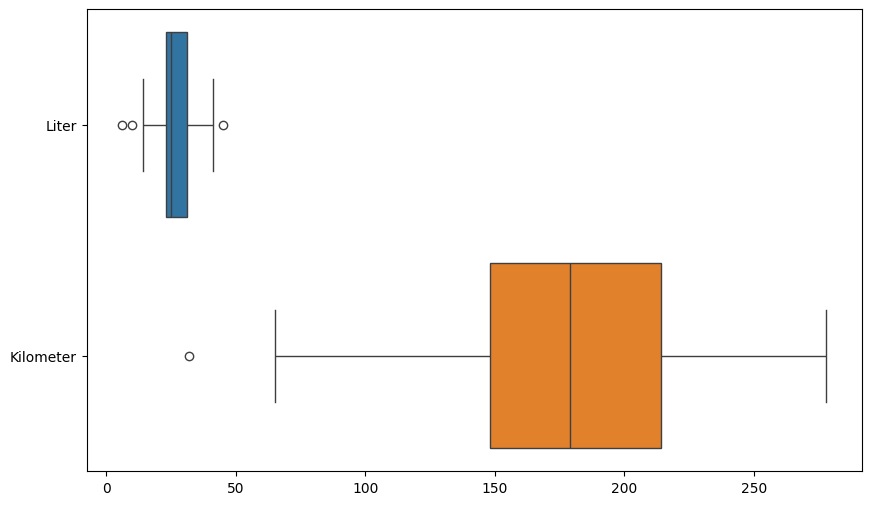

In [44]:
boxPlot(df2,0,2)

In [57]:
df3 = df2[(df2['Liter'] >= 12) & (df2['Liter'] < 44)] 
df3.shape

(54, 2)

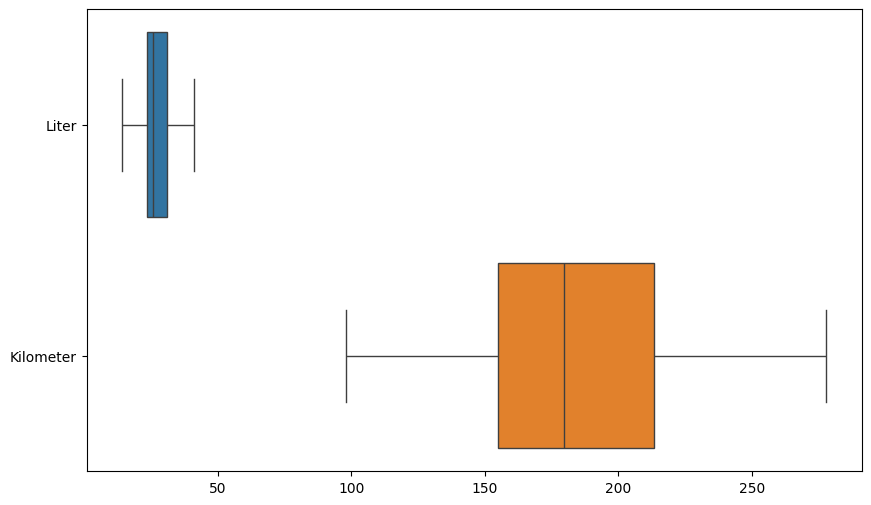

In [45]:
boxPlot(df3,0,2)

In [46]:
df3.describe()

,Liter,Kilometer
count,54.000000,54.000000
mean,27.129630,186.762963
std,6.521507,44.253427
min,14.000000,98.000000
25%,23.250000,154.800000
50%,25.500000,179.500000
75%,30.750000,213.525000
max,41.000000,278.000000


Data sudah dianggap bersih dan disimpan dalam variabel df

In [47]:
df = df3.copy()

# EDA (EXPLORATORY DATA ANALYSIS)

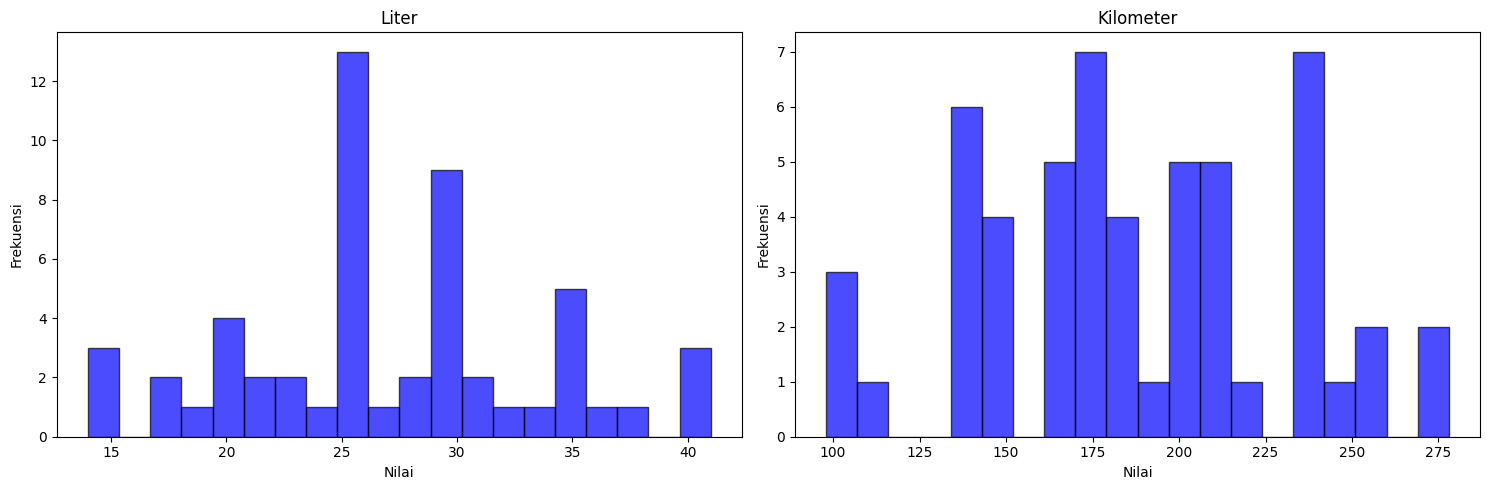

In [55]:
multHistogram(df, 1, 2)

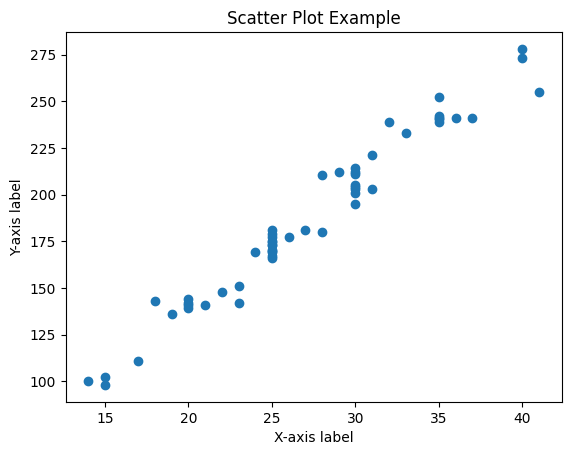

In [86]:
scatterPlot(df['Liter'], df['Kilometer'],False,0,0)

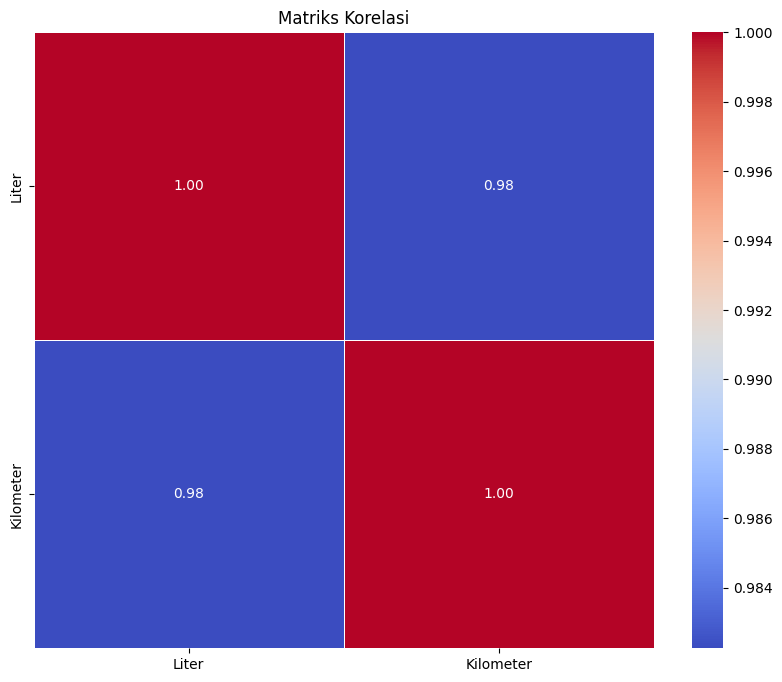

In [60]:
matrixCorr(df)

In [79]:
X = df[['Liter']]
y = df[['Kilometer']]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [82]:
model = lm.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
model.coef_

array([[6.5970961]])

In [84]:
model.intercept_

array([7.89694253])

Ini berarti y = 7.89694253 + 6.5970961x 

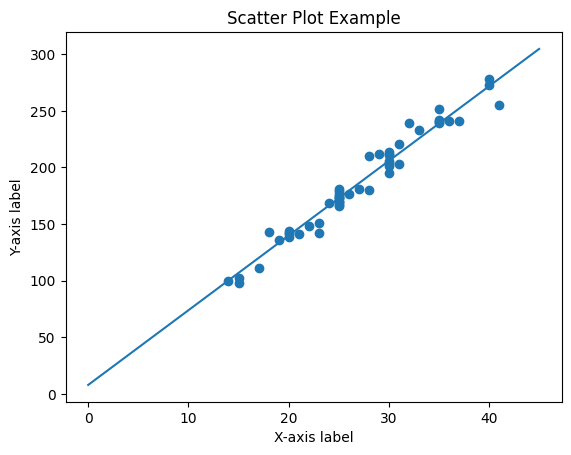

In [89]:
scatterPlot(X,y,True,model.coef_[0],model.intercept_)

In [90]:
model.score(X_test,y_test)

0.9748476511203101